<a href="https://colab.research.google.com/github/Layaa-V/Customer-Segmentation-Analysis/blob/main/Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Imports & load data
import os
import re
import pandas as pd
import numpy as np
from IPython.display import display

DATA_PATH="cleaned_customer_data.csv"
df=pd.read_csv(DATA_PATH)
print("Loaded file:", DATA_PATH)
print("Shape:", df.shape)
print("\nFirst 10 rows:")
display(df.head(10))


Loaded file: cleaned_customer_data.csv
Shape: (2240, 24)

First 10 rows:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
0,4.440072,-0.441154,-1.212194,-2.921589,1.702014,-0.933004,1.204538,-0.908896,0.584208,1.214454,...,1.333772,-0.299663,-0.151714,-0.972105,-0.239929,0.422676,-0.889899,-0.199140,-1.303815,-0.180862
1,-2.963183,0.130282,-0.043969,1.508977,-0.399798,1.895560,0.422089,1.633550,1.253528,0.663276,...,0.497868,-0.743200,-0.008859,-0.445665,-0.074259,-0.454633,-0.287264,-0.101832,-0.248411,-0.013024
2,2.041758,-1.179137,-1.362415,0.143487,0.277441,-0.888433,-0.274979,0.218121,-0.220829,-0.712737,...,0.002531,0.258796,-0.252426,-0.231615,-0.465430,-0.557716,-0.746706,-0.298896,1.099553,-0.284858
3,-2.699342,-1.587484,0.451775,0.307774,-0.899329,0.957434,-1.705891,0.623604,0.450687,-0.382943,...,0.401572,-0.454179,-0.213320,-0.409084,-0.136673,-0.008345,0.090320,-0.239212,0.048614,-0.406167
4,-0.752083,0.122107,-0.662017,-0.228723,-0.716655,0.026204,-1.004335,-1.656556,-0.707655,0.603419,...,0.674702,0.486841,-0.276584,-0.213139,0.097726,0.258561,0.266930,0.439670,0.753134,0.462823
5,0.334805,1.374950,-1.062427,0.797688,1.075291,-0.343130,-1.165638,0.240836,-0.174114,-1.062255,...,-0.549564,0.885264,-0.204538,0.147961,-0.733777,0.072093,0.255513,-0.243579,-0.041875,0.259069
6,0.175649,0.918839,-1.378136,-0.813701,0.034898,-0.091498,0.148705,0.828623,0.909120,0.848229,...,-0.502723,0.248113,-0.504839,-0.134090,-0.890145,-0.105113,0.555777,-0.124054,-0.353930,0.687869
7,-2.427369,-0.718338,0.483831,-0.266611,0.478305,-0.184282,-1.599224,-0.905570,-0.316560,-0.240126,...,0.119334,0.849163,0.206107,0.291485,0.330777,-0.144786,-0.186698,-0.009346,-0.163068,0.247417
8,-2.649008,-0.848914,1.595687,-0.494712,1.868868,0.357360,-0.998291,-1.220524,-0.108958,-0.159087,...,0.875826,0.715747,0.709979,-0.544800,-0.159641,1.183239,-0.617079,-0.269155,-0.094717,-0.382216
9,-4.415518,1.310346,2.659982,-1.381231,1.024997,0.684837,1.516696,0.344057,-2.368336,-1.105687,...,0.809228,1.708336,-0.743980,-1.704923,0.108636,-1.716007,-0.407246,-1.203124,-2.305540,0.262954


In [ ]:
#Quick overview & diagnostics
print("Columns:",list(df.columns))
print("\nData types:\n", df.dtypes)
print("\nMissing values per column:\n",df.isna().sum())
print("\nDescriptive statistics (numeric):")
display(df.describe().T)


Columns: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24']

Data types:
 PC1     float64
PC2     float64
PC3     float64
PC4     float64
PC5     float64
PC6     float64
PC7     float64
PC8     float64
PC9     float64
PC10    float64
PC11    float64
PC12    float64
PC13    float64
PC14    float64
PC15    float64
PC16    float64
PC17    float64
PC18    float64
PC19    float64
PC20    float64
PC21    float64
PC22    float64
PC23    float64
PC24    float64
dtype: object

Missing values per column:
 PC1     0
PC2     0
PC3     0
PC4     0
PC5     0
PC6     0
PC7     0
PC8     0
PC9     0
PC10    0
PC11    0
PC12    0
PC13    0
PC14    0
PC15    0
PC16    0
PC17    0
PC18    0
PC19    0
PC20    0
PC21    0
PC22    0
PC23    0
PC24    0
dtype: int64

Descriptive statistics (numeric):


,count,mean,std,min,25%,50%,75%,max
PC1,2240.0,-7.612958e-17,2.911587,-5.417011,-2.551424,-0.924591,2.140636,9.261371
PC2,2240.0,1.776357e-16,1.630866,-4.355107,-1.306177,-0.033268,1.141203,5.539089
PC3,2240.0,9.516197e-18,1.592835,-3.359206,-1.053848,-0.039231,0.571423,9.405349
PC4,2240.0,-8.564578e-17,1.253439,-5.721743,-0.765044,0.065624,0.819338,3.903649
PC5,2240.0,-2.061843e-17,1.117225,-3.638774,-0.740316,-0.058495,0.729902,4.258498
PC6,2240.0,5.630417e-17,1.098331,-4.296523,-0.521319,0.000643,0.632230,4.432281
PC7,2240.0,-1.046782e-16,1.030852,-2.786940,-0.627954,-0.062096,0.502669,8.150095
PC8,2240.0,1.586033e-18,1.015065,-5.292435,-0.594607,0.004837,0.602801,3.558674
PC9,2240.0,1.903239e-17,1.008256,-3.554414,-0.560371,-0.039332,0.560448,6.828643
PC10,2240.0,-6.344132e-18,1.003802,-5.950596,-0.624835,-0.066448,0.756084,2.725606


In [ ]:
#Feature selection
numeric_df=df.select_dtypes(include=[np.number]).copy()
print("Using numeric feature set with shape:",numeric_df.shape)
# Drop common ID columns if present
for possible_id in ["CustomerID","customer_id","ID","Id","id"]:
    if possible_id in numeric_df.columns:
        numeric_df=numeric_df.drop(columns=[possible_id])
        print("Dropped ID column:", possible_id)

print("\nNumeric columns:")
display(numeric_df.columns.tolist())


Using numeric feature set with shape: (2240, 24)

Numeric columns:


['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14',
 'PC15',
 'PC16',
 'PC17',
 'PC18',
 'PC19',
 'PC20',
 'PC21',
 'PC22',
 'PC23',
 'PC24']

In [ ]:
#Standardize features
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X=scaler.fit_transform(numeric_df.values)
X_df=pd.DataFrame(X,columns=numeric_df.columns,index=numeric_df.index)

print("Scaled data shape:",X_df.shape)
print("\nScaled features (first 8 rows):")
display(X_df.head(8))


Scaled data shape: (2240, 24)

Scaled features (first 8 rows):


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
0,1.525307,-0.270563,-0.761199,-2.331378,1.523770,-0.849664,1.168749,-0.895607,0.579554,1.210125,...,1.593293,-0.368614,-0.193746,-1.263622,-0.323989,0.584702,-1.297187,-0.297991,-2.017099,-0.288624
1,-1.017948,0.079903,-0.027610,1.204138,-0.357929,1.726241,0.409548,1.609665,1.243541,0.660912,...,0.594742,-0.914206,-0.011313,-0.579312,-0.100276,-0.628909,-0.418739,-0.152381,-0.384310,-0.020784
2,0.701409,-0.723174,-0.855531,0.114500,0.248386,-0.809075,-0.266809,0.214932,-0.219070,-0.710197,...,0.003024,0.318344,-0.322361,-0.301073,-0.628497,-0.771508,-1.088459,-0.447266,1.701090,-0.454584
3,-0.927310,-0.973617,0.283693,0.245598,-0.805146,0.871912,-1.655206,0.614486,0.447097,-0.381578,...,0.479709,-0.558683,-0.272421,-0.531762,-0.184558,-0.011544,0.131657,-0.357955,0.075209,-0.648173
4,-0.258365,0.074889,-0.415715,-0.182517,-0.641603,0.023863,-0.974494,-1.632335,-0.702017,0.601268,...,0.805984,0.598860,-0.353211,-0.277056,0.131965,0.357676,0.389098,0.657919,1.165154,0.738587
5,0.115016,0.843268,-0.667153,0.636542,0.962681,-0.312480,-1.131005,0.237315,-0.172727,-1.058468,...,-0.656496,1.088958,-0.261205,0.192332,-0.990861,0.099728,0.372456,-0.364491,-0.064783,0.413430
6,0.060341,0.563531,-0.865403,-0.649319,0.031243,-0.083325,0.144287,0.816508,0.901877,0.845205,...,-0.600542,0.305203,-0.644704,-0.174302,-1.202014,-0.145406,0.810144,-0.185633,-0.547556,1.097721
7,-0.833879,-0.440562,0.303822,-0.212751,0.428214,-0.167821,-1.551708,-0.892330,-0.314038,-0.239270,...,0.142553,1.044550,0.263208,0.378896,0.446667,-0.200288,-0.272146,-0.013986,-0.252278,0.394835


In [ ]:
#Pairwise distance matrix
from scipy.spatial.distance import pdist, squareform

print("Computing pairwise Euclidean distances.")
pairwise_dist=squareform(pdist(X, metric='euclidean'))
pairwise_df=pd.DataFrame(pairwise_dist, index=numeric_df.index, columns=numeric_df.index)
print("Pairwise distance matrix shape:", pairwise_df.shape)

print("\nPairwise distances (first 12 rows & cols):")
display(pairwise_df.iloc[:12, :12])


Computing pairwise Euclidean distances.
Pairwise distance matrix shape: (2240, 2240)

Pairwise distances (first 12 rows & cols):


,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,7.097033,6.868954,7.908733,7.080187,7.324217,6.084679,6.946513,5.914917,8.150124,6.776337,8.838148
1,7.097033,0.000000,5.389744,4.019718,5.789646,5.237511,4.243128,5.275998,5.748914,8.147611,4.436048,8.048255
2,6.868954,5.389744,0.000000,4.346093,5.067625,3.947149,4.587528,4.281456,5.148660,8.766188,3.900030,7.462601
3,7.908733,4.019718,4.346093,0.000000,4.736884,4.397219,4.699693,3.570818,4.894369,8.480050,3.408779,7.597419
4,7.080187,5.789646,5.067625,4.736884,0.000000,4.490872,4.899118,3.322238,5.045463,8.597046,4.622171,7.783935
5,7.324217,5.237511,3.947149,4.397219,4.490872,0.000000,3.479669,3.309804,4.843991,8.053852,3.990259,7.412412
6,6.084679,4.243128,4.587528,4.699693,4.899118,3.479669,0.000000,4.496349,5.678346,8.103656,4.200250,7.507553
7,6.946513,5.275998,4.281456,3.570818,3.322238,3.309804,4.496349,0.000000,3.654051,7.485023,2.814533,7.431304
8,5.914917,5.748914,5.148660,4.894369,5.045463,4.843991,5.678346,3.654051,0.000000,7.936733,4.191504,7.842222
9,8.150124,8.147611,8.766188,8.480050,8.597046,8.053852,8.103656,7.485023,7.936733,0.000000,8.098116,9.903066


In [ ]:
#Compute linkage
from scipy.cluster.hierarchy import linkage

linkage_method='ward'
print(f"Computing linkage using method='{linkage_method}' ...")
Z=linkage(X, method=linkage_method, metric='euclidean')
print("Linkage matrix computed. Shape:",Z.shape)
print("First 6 rows of linkage matrix (each row: idx1, idx2, distance, sample_count):")
print(Z[:6])


Computing linkage using method='ward' ...
Linkage matrix computed. Shape: (2239, 4)
First 6 rows of linkage matrix (each row: idx1, idx2, distance, sample_count):
[[6.830e+02 2.179e+03 0.000e+00 2.000e+00]
 [6.010e+02 1.481e+03 0.000e+00 2.000e+00]
 [2.400e+01 5.810e+02 0.000e+00 2.000e+00]
 [8.180e+02 1.401e+03 0.000e+00 2.000e+00]
 [6.620e+02 7.520e+02 0.000e+00 2.000e+00]
 [8.000e+01 1.776e+03 0.000e+00 2.000e+00]]


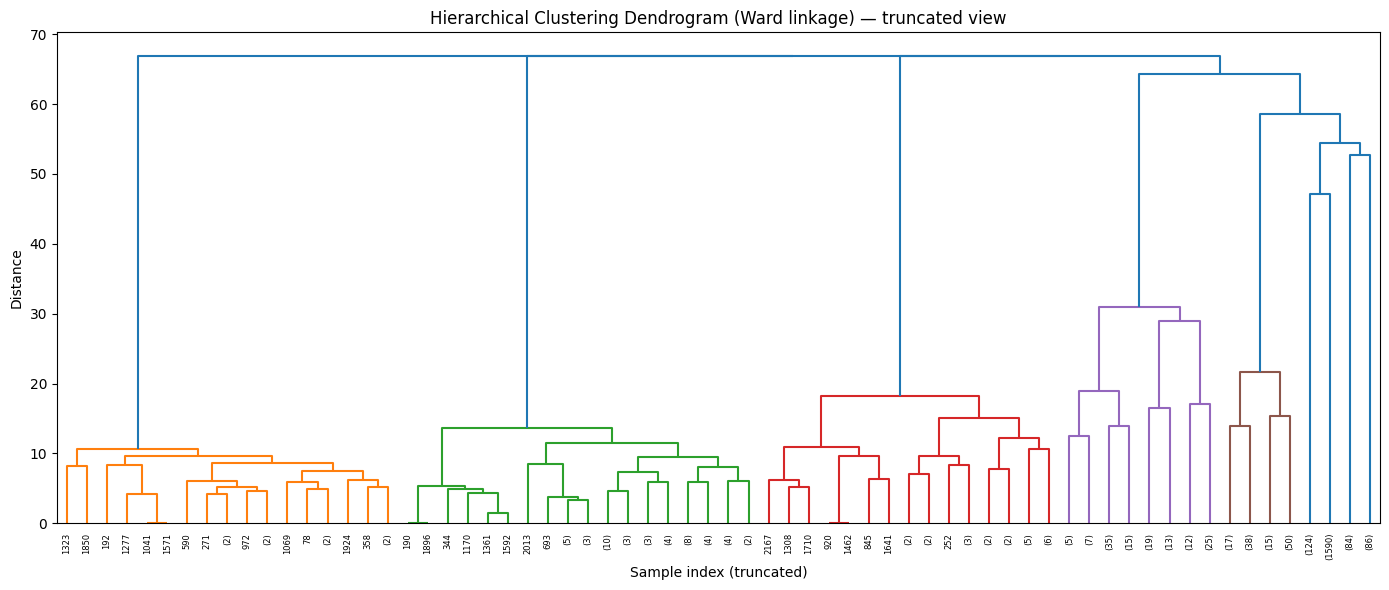

In [ ]:
# Dendrogram (visual)
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.title("Hierarchical Clustering Dendrogram (Ward linkage) — truncated view")
_ = dendrogram(Z, truncate_mode='level', p=6)
plt.xlabel("Sample index (truncated)")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()


In [ ]:
#Evaluating cluster counts using internal metrics
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

candidates=[2, 3, 4, 5, 6]
results=[]
print("Evaluating candidate cluster counts:", candidates)
for k in candidates:
    labels=fcluster(Z, k, criterion='maxclust')
    sil=silhouette_score(X, labels)
    db=davies_bouldin_score(X, labels)
    ch=calinski_harabasz_score(X, labels)
    results.append((k, sil, db, ch))
results_df=pd.DataFrame(results, columns=["k", "silhouette", "davies_bouldin", "calinski_harabasz"])
display(results_df)


Evaluating candidate cluster counts: [2, 3, 4, 5, 6]


,k,silhouette,davies_bouldin,calinski_harabasz
0,2,0.472442,0.819439,97.278213
1,3,0.270751,1.025529,101.644783
2,4,0.281389,1.038889,106.387083
3,5,0.267731,1.575992,109.151927
4,6,0.170264,1.645914,108.419574


In [ ]:
#Choose k (highest silhouette among tested) & assign labels
from scipy.cluster.hierarchy import fcluster

best_k=int(results_df.loc[results_df['silhouette'].idxmax(), 'k'])
print("Selected best_k by silhouette among tried candidates:", best_k)

hierarchical_labels = fcluster(Z, best_k, criterion='maxclust')
df['cluster']=hierarchical_labels  # append to original dataframe for profiling

print("\nCluster label counts:")
display(df['cluster'].value_counts().sort_index().rename_axis("cluster").reset_index(name="count"))


Selected best_k by silhouette among tried candidates: 2

Cluster label counts:


,cluster,count
0,1,21
1,2,2219


In [ ]:
#Cluster profiling
cluster_means=df.groupby('cluster').mean()
cluster_counts=df['cluster'].value_counts().sort_index()

print("Cluster sizes:")
display(cluster_counts.reset_index().rename(columns={"index":"cluster","cluster":"count"}))

print("\nCluster means (numeric features):")
display(cluster_means)


Cluster sizes:


,count,count
0,1,21
1,2,2219



Cluster means (numeric features):


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
cluster,,,,,,,,,,,,,,,,,,,,,
1,-1.173482,-0.062710,-0.210572,-0.739367,-0.384041,0.313053,5.531248,-4.064887,5.188819,-4.409602,...,0.222482,0.200672,-0.083069,0.222301,0.291716,0.259487,0.110056,0.098786,-0.158301,0.009577
2,0.011106,0.000593,0.001993,0.006997,0.003634,-0.002963,-0.052346,0.038469,-0.049106,0.041731,...,-0.002106,-0.001899,0.000786,-0.002104,-0.002761,-0.002456,-0.001042,-0.000935,0.001498,-0.000091


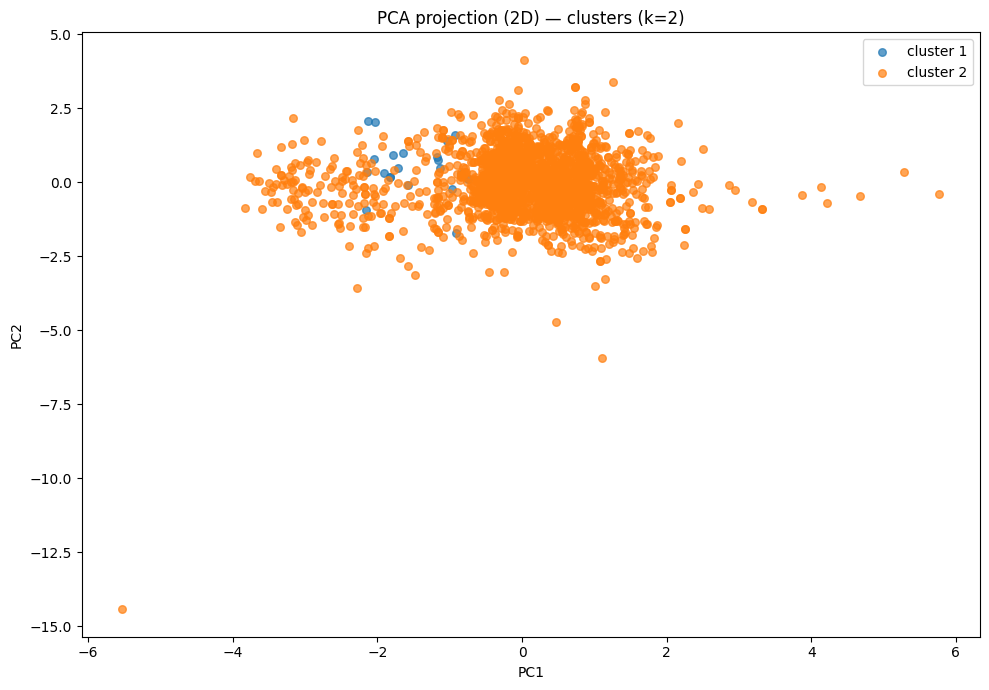


Explained variance ratio (PC1, PC2): [0.04166667 0.04166667]


In [ ]:
#PCA 2D scatter
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)
pca_df = pd.DataFrame(X_pca, columns=['PC1','PC2'], index=numeric_df.index)
pca_df['cluster'] = hierarchical_labels

plt.figure(figsize=(10, 7))
plt.title(f"PCA projection (2D) — clusters (k={best_k})")
for lbl in sorted(pca_df['cluster'].unique()):
    mask = pca_df['cluster'] == lbl
    plt.scatter(pca_df.loc[mask, 'PC1'], pca_df.loc[mask, 'PC2'], label=f"cluster {lbl}", s=30, alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.tight_layout()
plt.show()

print("\nExplained variance ratio (PC1, PC2):", pca.explained_variance_ratio_)


In [ ]:
output_path = "all_outputs.txt"
# Open in append mode and write new results
with open(output_path, "a") as f:
    f.write("Hierarchical_result = " + ",".join(map(str, hierarchical_labels)))
print(f" Hierarchical results appended to: {output_path}")

 Hierarchical results appended to: all_outputs.txt
